## Objetivos: 
### Pré tratamento; 
### análise exploratória; 
### Gerar um dataset limpo pronto para ser utilizado para geração de modelos

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
df = pd.read_csv("https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2020-09/informe_epidemiologico_30_09_2020_geral.csv", delimiter=";")

In [50]:
df.head(10)

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO
0,4126207,4126207,M,82,SAPOPEMA,SAPOPEMA,ONE STEP COVID-19 TEST,16/09/2020,29/09/2020,NaN,Não,NaN,NaN,Recuperado,29/09/2020,NOTIFICA COVID
1,4106902,4106902,F,15,CURITIBA,CURITIBA,IBMP,29/09/2020,29/09/2020,25/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
2,4127700,4127700,M,68,TOLEDO,TOLEDO,LACEN,28/09/2020,29/09/2020,03/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,4108304,4108304,M,59,FOZ DO IGUACU,FOZ DO IGUACU,LPGL - Foz do Iguaçu,28/09/2020,29/09/2020,09/08/2020,Não,NaN,NaN,Recuperado,29/09/2020,NOTIFICA COVID
4,4113700,4113700,F,54,LONDRINA,LONDRINA,UEL,28/09/2020,29/09/2020,21/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
5,9999999,4104006,M,62,ARAGUAINA,CAMPINA GRANDE DO SUL,LACEN,28/09/2020,29/09/2020,22/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
6,4115200,4115200,M,74,MARINGA,MARINGA,IBMP,28/09/2020,29/09/2020,22/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
7,4108403,4108403,M,51,FRANCISCO BELTRAO,FRANCISCO BELTRAO,Biolabor,28/09/2020,29/09/2020,26/09/2020,NaN,NaN,NaN,NaN,NaN,NaN
8,4127700,4127700,M,47,TOLEDO,TOLEDO,IBMP,28/09/2020,29/09/2020,19/09/2020,Não,NaN,NaN,Recuperado,30/09/2020,NOTIFICA COVID
9,4113700,4113700,M,51,LONDRINA,LONDRINA,UEL,28/09/2020,29/09/2020,23/09/2020,NaN,NaN,NaN,NaN,NaN,NaN


## Existem valores ausentes? Quantos %?

In [51]:
df.isnull().mean() * 100

IBGE_RES_PR                     0.000000
IBGE_ATEND_PR                   0.000000
SEXO                            0.000000
IDADE_ORIGINAL                  0.007267
MUN_RESIDENCIA                  0.000000
MUN_ATENDIMENTO                 0.000559
LABORATORIO                     0.000559
DATA_DIAGNOSTICO                0.582455
DATA_CONFIRMACAO_DIVULGACAO     0.000000
DATA_INICIO_SINTOMAS           23.118760
OBITO                          22.214334
DATA_OBITO                     97.492985
DATA_OBITO_DIVULGACAO          98.385672
STATUS                         26.870060
DATA_RECUPERADO_DIVULGACAO     43.462755
FONTE_DADO_RECUPERADO          27.876220
dtype: float64

<AxesSubplot:>

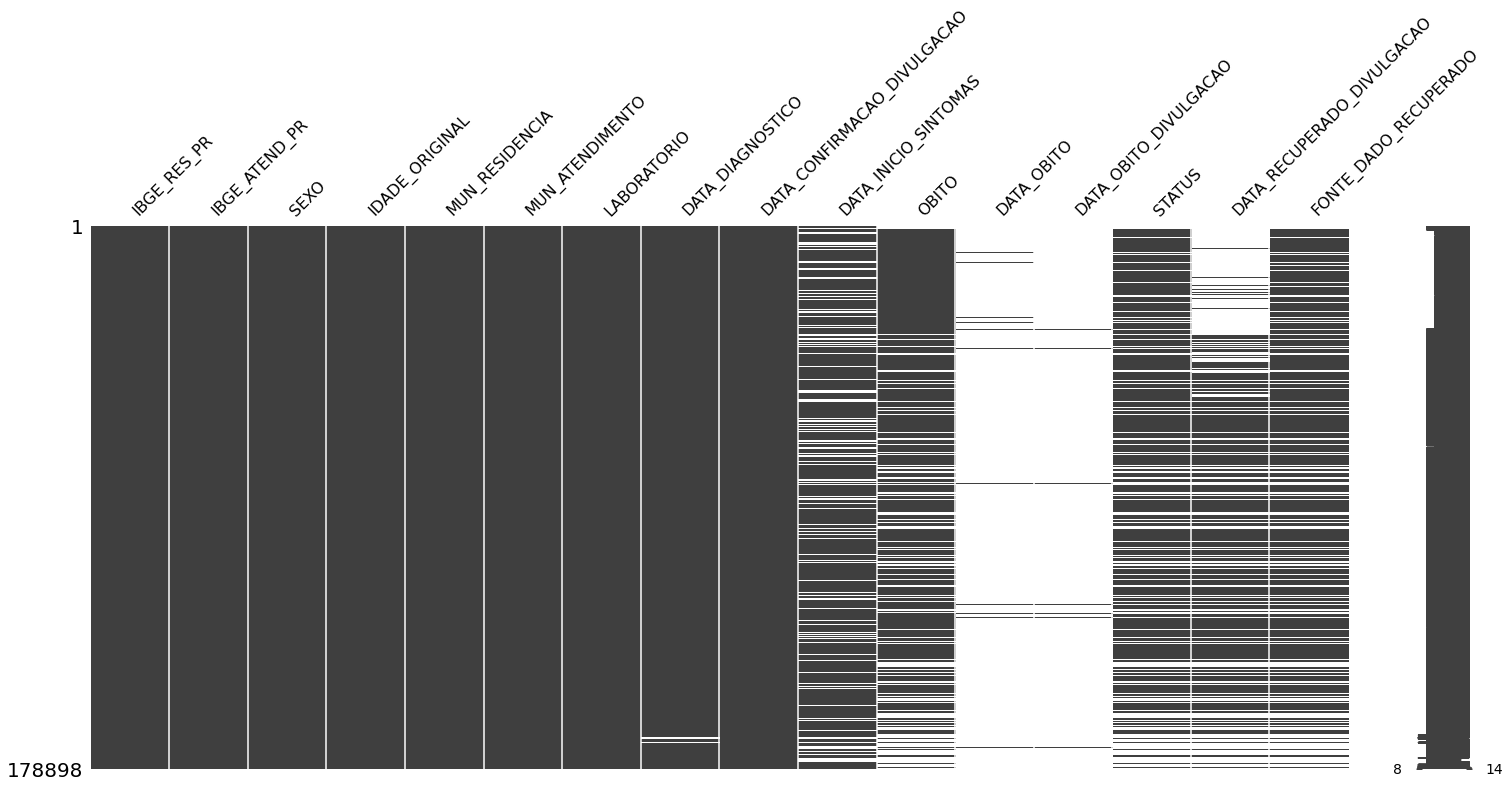

In [52]:
import missingno as msno
msno.matrix(df)

In [53]:
df.shape

(178898, 16)

## Remover colunas redundantes e com muitos valores ausentes

In [54]:
df = df.drop(columns=["DATA_OBITO", "DATA_OBITO_DIVULGACAO", "DATA_RECUPERADO_DIVULGACAO", "STATUS", "FONTE_DADO_RECUPERADO", "IBGE_RES_PR", "IBGE_ATEND_PR"])

<AxesSubplot:>

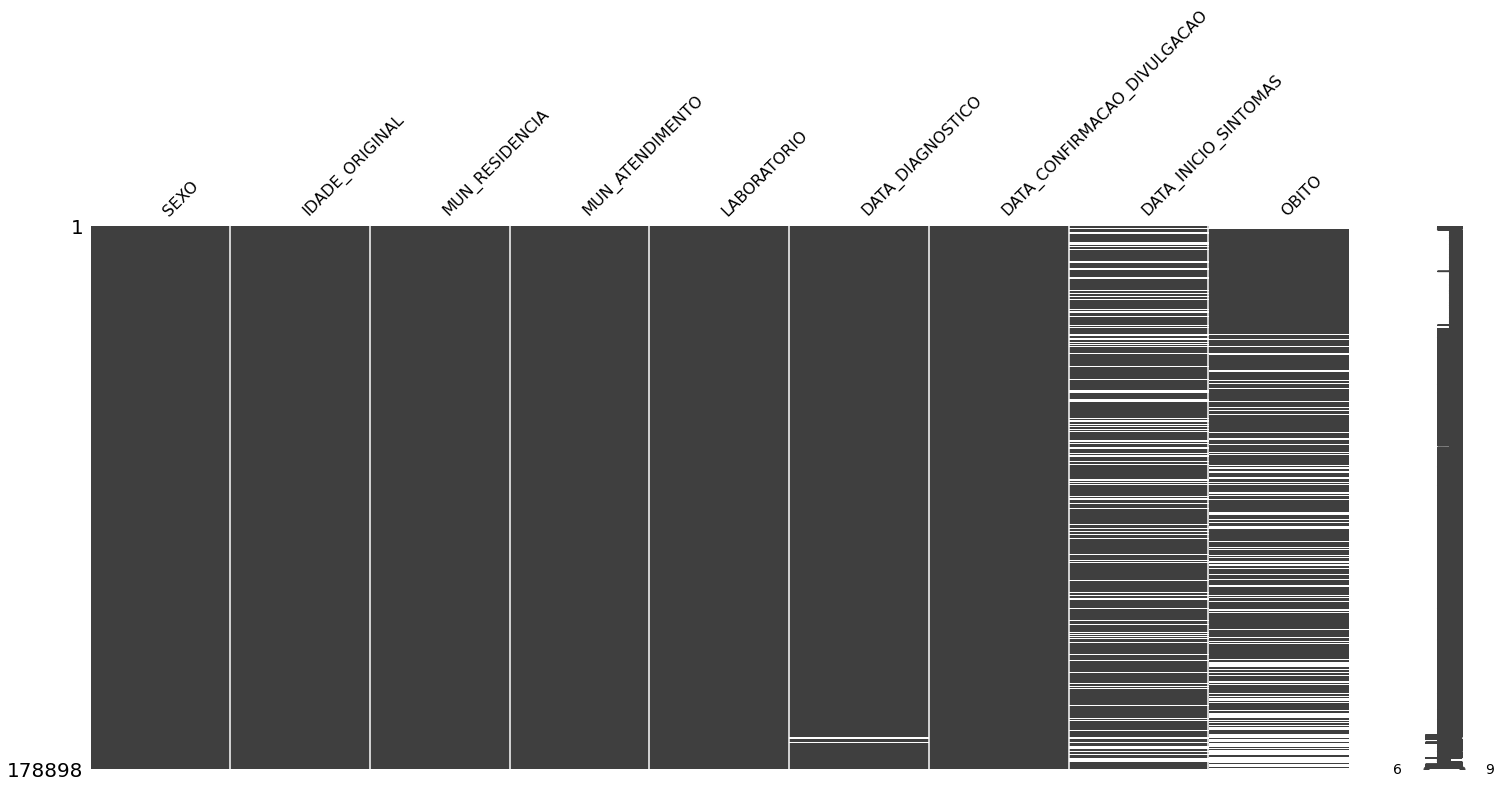

In [55]:
msno.matrix(df)

In [56]:
df.isnull().mean() * 100

SEXO                            0.000000
IDADE_ORIGINAL                  0.007267
MUN_RESIDENCIA                  0.000000
MUN_ATENDIMENTO                 0.000559
LABORATORIO                     0.000559
DATA_DIAGNOSTICO                0.582455
DATA_CONFIRMACAO_DIVULGACAO     0.000000
DATA_INICIO_SINTOMAS           23.118760
OBITO                          22.214334
dtype: float64

## Removendo linhas com dados ausentes

In [57]:
df = df.dropna()
df.shape

(108075, 9)

In [58]:
 df.head()

,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO
3,M,59,FOZ DO IGUACU,FOZ DO IGUACU,LPGL - Foz do Iguaçu,28/09/2020,29/09/2020,09/08/2020,Não
8,M,47,TOLEDO,TOLEDO,IBMP,28/09/2020,29/09/2020,19/09/2020,Não
11,M,32,CASCAVEL,CASCAVEL,Parzianello,28/09/2020,29/09/2020,25/09/2020,Não
13,M,70,IPIRANGA,PONTA GROSSA,LACEN,28/09/2020,29/09/2020,13/09/2020,SIM
16,M,19,FOZ DO IGUACU,FOZ DO IGUACU,LPGL - Foz do Iguaçu,28/09/2020,29/09/2020,11/08/2020,Não


### Trocando o "não"/"sim" da coluna de óbitos por 0 e 1. OrdinalEncoder

In [59]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df['OBITO'] = oe.fit_transform(df[['OBITO']])

In [60]:
df.head()

,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO
3,M,59,FOZ DO IGUACU,FOZ DO IGUACU,LPGL - Foz do Iguaçu,28/09/2020,29/09/2020,09/08/2020,0.0
8,M,47,TOLEDO,TOLEDO,IBMP,28/09/2020,29/09/2020,19/09/2020,0.0
11,M,32,CASCAVEL,CASCAVEL,Parzianello,28/09/2020,29/09/2020,25/09/2020,0.0
13,M,70,IPIRANGA,PONTA GROSSA,LACEN,28/09/2020,29/09/2020,13/09/2020,1.0
16,M,19,FOZ DO IGUACU,FOZ DO IGUACU,LPGL - Foz do Iguaçu,28/09/2020,29/09/2020,11/08/2020,0.0


## Cidades com maior numero de casos.


In [61]:
cidades_mais_casos = df['MUN_RESIDENCIA'].value_counts().nlargest(10)
cidades_mais_casos

CURITIBA         19559
LONDRINA          6402
CASCAVEL          4808
FOZ DO IGUACU     3896
MARINGA           3223
ARAUCARIA         2880
TOLEDO            2753
PONTA GROSSA      2615
PARANAGUA         2613
COLOMBO           2355
Name: MUN_RESIDENCIA, dtype: int64

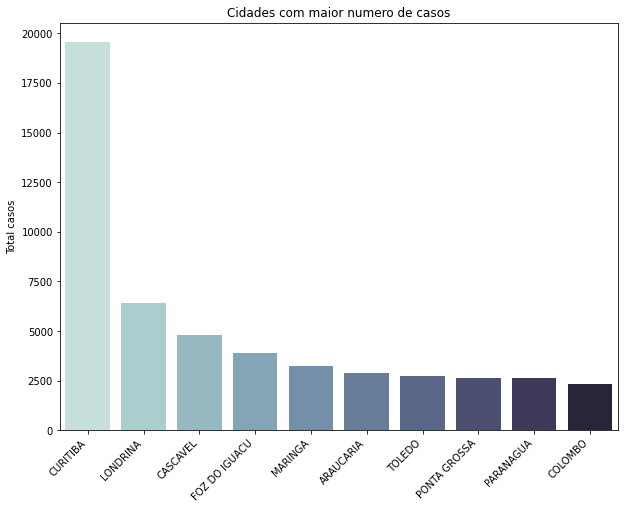

In [62]:
# Apresentação gŕafica

plt.figure(figsize=(10,7.5))
sns.barplot(x=cidades_mais_casos.index, y=cidades_mais_casos.values, palette="ch:s=.25,rot=-.35")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.ylabel("Total casos")
plt.title('Cidades com maior numero de casos')
plt.show()

In [63]:
obitos = df.loc[(df['OBITO'] == 1)].copy()
obitos

,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO
13,M,70,IPIRANGA,PONTA GROSSA,LACEN,28/09/2020,29/09/2020,13/09/2020,1.0
375,M,61,ARAUCARIA,CURITIBA,LACEN,28/09/2020,29/09/2020,24/09/2020,1.0
613,F,50,APUCARANA,APUCARANA,LACEN,28/09/2020,29/09/2020,18/09/2020,1.0
634,M,93,CURITIBA,CURITIBA,LACEN,28/09/2020,29/09/2020,22/09/2020,1.0
695,F,56,CASCAVEL,CASCAVEL,LACEN,28/09/2020,29/09/2020,17/09/2020,1.0
...,...,...,...,...,...,...,...,...,...
176824,M,70,SAO JOSE DOS PINHAIS,CURITIBA,LACEN,27/09/2020,28/09/2020,09/09/2020,1.0
176967,F,64,COLOMBO,CURITIBA,LACEN,27/09/2020,28/09/2020,23/09/2020,1.0
177746,F,56,CURITIBA,CURITIBA,UNIMED,29/09/2020,30/09/2020,21/09/2020,1.0
178043,M,76,SARANDI,SARANDI,"COVID-19, Biologia Molecular",02/09/2020,30/09/2020,24/09/2020,1.0


### Relação entre óbitos, idade e sexo

<Figure size 4320x5760 with 0 Axes>

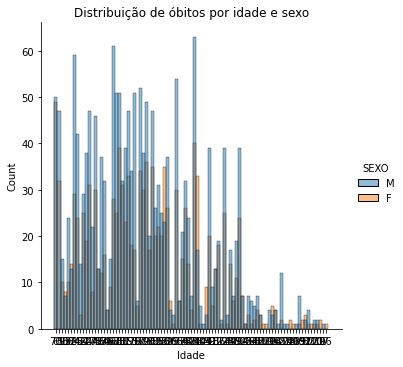

In [64]:
plt.figure(figsize=(60, 80))
sns.displot(obitos, x='IDADE_ORIGINAL', binwidth=5, hue='SEXO')
plt.xlabel('Idade')
plt.title('Distribuição de óbitos por idade e sexo')
plt.show()

### Buscando outliers

### Existem valores não numéricos na coluna idade, será necessário fazer uma conversão. 

In [65]:
df[df['IDADE_ORIGINAL']=='4 dias']

,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO
2175,M,4 dias,CURITIBA,CURITIBA,IBMP,12/06/2020,13/06/2020,05/06/2020,0.0


In [66]:
## Convertendo idades menores que 1 ano para inteiro

idades = ['2 MESES', '3 MESES', '4 MESES', '5 MESES', '6 MESES', '7 MESES', '8 MESES','9 MESES','10 MESES','11 MESES']
convertido = [2/12, 3/12, 4/12, 5/12, 6/12, 7/12, 8/12, 9/12, 10/12, 11/12]

for i in range (len(idades)):
    df.loc[df['IDADE_ORIGINAL'] == idades[i], "IDADE_ORIGINAL"] = convertido[i]

### Visualizando outliers com o boxplot

<AxesSubplot:title={'center':'alcool por volume.'}, xlabel='IDADE_ORIGINAL'>

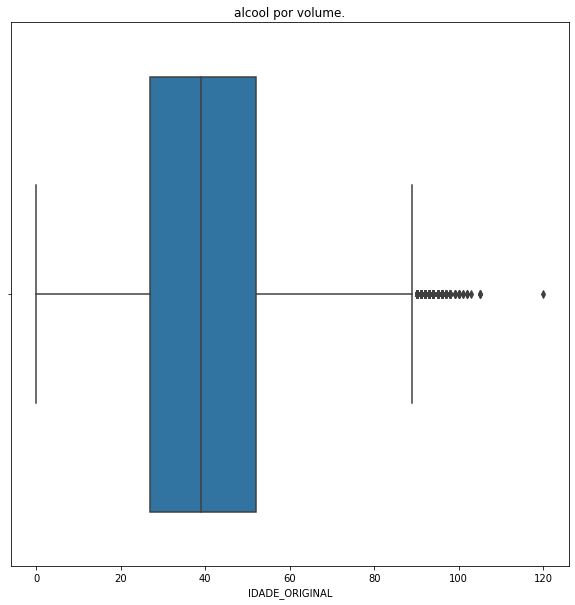

In [67]:
#Converte a idade para numérico

df["IDADE_ORIGINAL"] = pd.to_numeric(df["IDADE_ORIGINAL"], errors='coerce') #Outros valores não numeŕicos serão convertidos para NaN

plt.figure(figsize=(10,10))
plt.title('alcool por volume.')
sns.boxplot(x='IDADE_ORIGINAL', data=df)

### Remoção de NaN gerados pela conversão da idade

In [68]:
df = df.dropna()
df.shape

(107794, 9)

## Lidando com classes desbalanceadas

Por mais que as classes estejam desbalanceadas, a escolha de remover dados ou fazer um upsampling depende do modelo que será escolhido e das métricas de avaliação, portanto neste momento escolhi manter o dataset original

## Convertendo dados categóricos com o OneHotEncoder


In [71]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

clean_data = ohe.fit_transform(df)

clean_data.toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [72]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array([  0.        ,   0.16666667,   0.25      ,   0.33333333,
          0.41666667,   0.5       ,   0.58333333,   0.66666667,
          0.75      ,   0.83333333,   0.91666667,   1.        ,
          2.        ,   3.        ,   4.        ,   5.        ,
          6.        ,   7.        ,   8.        ,   9.        ,
         10.        ,  11.        ,  12.        ,  13.        ,
         14.        ,  15.        ,  16.        ,  17.        ,
         18.        ,  19.        ,  20.        ,  21.        ,
         22.        ,  23.        ,  24.        ,  25.        ,
         26.        ,  27.        ,  28.        ,  29.        ,
         30.        ,  31.        ,  32.        ,  33.        ,
         34.        ,  35.        ,  36.        ,  37.        ,
         38.        ,  39.        ,  40.        ,  41.        ,
         42.        ,  43.        ,  44.        ,  45.        ,
         46.        ,  47.        ,  48.        ,  49.        ,
      

In [ ]:
clean_df = pd.DataFrame(clean_data.toarray(), columns=['SEXO', 'IDADE_ORIGINAL', 'MUN_RESIDENCIA', 'MUN_ATENDIMENTO', 'LABORATORIO','DATA_DIAGNOSTICO','DATA_CONFIRMACAO_DIVULGACAO','DATA_INICIO_SINTOMAS','OBITO'])

# Próximos passos:

### FIltrar melhor campos com digitação incorreta e campos duplicados, por exemplo: UEL e Universidade Estadual de Londrina
### Fazer uma análise de quais atributos são mais importantes
### Testar combinações entre diferentes atributos
### Fazer o escalonamento das características
### Criar um pipeline para facilitar a sequência de transformações dos dados.